#### Euro Problem - Think Bayes Page 33, Ch 4 

When spun on edge 250 times, a Belgian one-euro coin
came up heads 140 times and tails 110. ‘It looks very
suspicious to me,’ said Barry Blight, a statistics lecturer
at the London School of Economics. ‘If the coin were
unbiased, the chance of getting a result as extreme as
that would be less than 7%.’
But do these data give evidence that the coin is biased rather
than fair?

http://www.greenteapress.com/thinkbayes/thinkbayes.pdf

#### Defining Hypotheses: 
- The probability of a coin showing up head is 0.5 if it is perfectly balanced. Otherwise it can take any value depending on its position and physical characterstics of the coin.
- If an **uniform prior** is assumed, then the probability of finding head equally varies from 0 to 1.
- So 101 hypotheses are defined - n: from 0 to 100 - each representing n% probability of finding a head.

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt

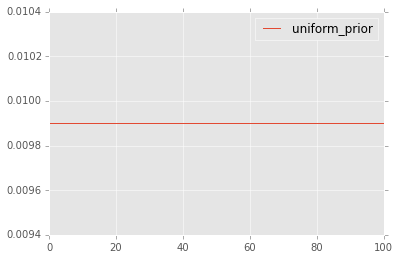

In [4]:
uniform_prior = lambda n: 1./n
range_hyp = range(0,101)
df = pd.DataFrame()
df['hyp'] = range_hyp
df['uniform_prior'] = uniform_prior(len(df))
df
df.uniform_prior.plot(label = 'uniform_prior', legend = True)

- The likelihood is defined as the probability of getting heads 140 times and tails 110 times given the hypothesis.

In [1]:
observations = 'T' * 110 + 'H' * 140
dataset = list(observations)
print dataset

['T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H',

 - The likelihood for each hypothesis numbered x, is the value x/100 if it is 'Head' or (1 - x/100) if it is 'Tail'
 - The posterior thus will be the prior times likelihood divided by the normalizing constant.
 - The normalizing constant is the probability of the data which is the sum of all likelihoods.

0.1274531805839112

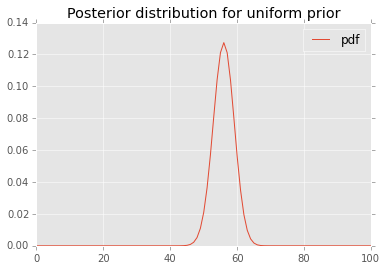

In [14]:
df['prior_times_likelihood'] = df.uniform_prior

calc_likelihood = lambda df, data: df.hyp/100.0 if data is 'H' else (1 - (df.hyp/100.0))

for data in dataset:
    df.prior_times_likelihood = df.prior_times_likelihood * calc_likelihood(df, data)

# posterior equals prior times likelihood/ sum(all likelihoods)
df['posterior'] = df.prior_times_likelihood / sum(df.prior_times_likelihood)

df.posterior.plot(legend = True, label = 'pdf', title = 'Posterior distribution for uniform prior')
#df.boxplot('posterior')
df.posterior.loc[56]

In [12]:
df.posterior.describe()

count    1.010000e+02
mean     9.900990e-03
std      2.834711e-02
min      0.000000e+00
25%      6.481917e-48
50%      1.333921e-17
75%      2.576620e-05
max      1.274532e-01
Name: posterior, dtype: float64

#### Summarizing the posterior distribution

- The maximum likelihood finds the most likely value in the probability distribution.

In [82]:
max_likelihood = lambda df_dict: max(df_dict, key=df_dict.get)
max_likelihood(df.posterior.to_dict())

56

- Also, the data has 140 heads out of 250 tosses - probability of 56% which is equal to the maximum likelihood.

- The mean of the posterior distribution is the total sum of the product of the hypotheses and its respective posterior probability.

In [160]:
def calc_mean(df):
    """
    returns the mean of the posterior distribution
    """
    total = 0
    for value, prob in df.iteritems():
        total += value * prob
    return total
print calc_mean(df.posterior)

55.9523809524


- The mean is 55.95.

- The median of the posterior is the hypothesis having whose percentile is 50.

In [161]:
def calc_hyp_percentile_pdf(df, percentile):
    """
    returns the hypothesis having the respective percentile - pdf
    """
    total = 0
    for hyp, prob in df.iteritems():
        total += prob
        if total >= percentile:
            return hyp
print calc_hyp_percentile_pdf(df.posterior, .50)

56


- The confidence interval is the range of hypotheses whose percentiles is between 5% and 95% 

In [162]:
df_ci = ( calc_hyp_percentile_pdf(df.posterior, .05) , calc_hyp_percentile_pdf(df.posterior, .95) )
df_ci

(51, 61)

#### Alternate way of summarizing the posterior

- The confidence intervals can also be calculated using the cumulative distribution(cdf) of the posterior.
- The cdf is a distribution that maps the values to its respective percentile ranks.

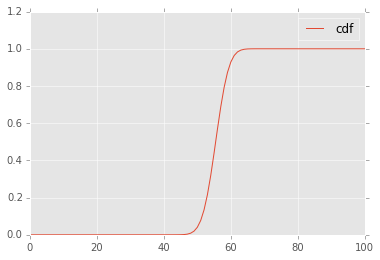

In [16]:
df_cdf = df.posterior.cumsum()
#df_cdf
df_cdf.plot(label='cdf', legend=True)

In [164]:
def calc_hyp_percentile_cdf(df, percentile):
    """
    returns the hypothesis having the respective percentile - cdf
    """
    df_cdf = df.cumsum()
    cdf_dict = df_cdf.to_dict()
    total = 0
    for key, value in cdf_dict.iteritems():
        return min(cdf_dict, key=lambda k:abs(percentile - cdf_dict[k]))

In [165]:
df_ci_cdf = ( calc_hyp_percentile_cdf(df.posterior, .05) , calc_hyp_percentile_cdf(df.posterior, .95) )
df_ci_cdf

(50, 61)

- **Since the confidence interval does not have 50% in it, the coin is not fair.**

#### Non-Uniform Prior

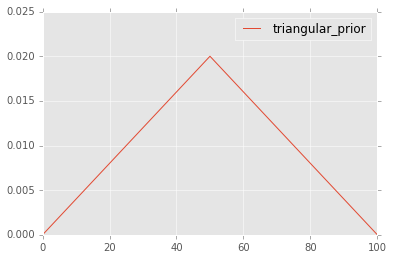

In [166]:
triangular_prior = lambda n: n if n < 51 else 100 - n
df_non_uniform = pd.DataFrame()
df_non_uniform['hyp'] = range_hyp
triangular_prior_range = [triangular_prior(hyp) for hyp in range_hyp ]
triangular_prior = [prior/float(sum(triangular_prior_range)) for prior in triangular_prior_range]
df_non_uniform['triangular_prior'] = triangular_prior
df_non_uniform.triangular_prior.plot(label = 'triangular_prior', legend = True)

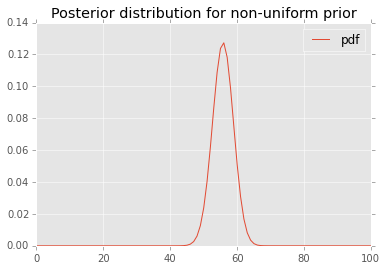

In [185]:
df_non_uniform['prior_times_likelihood'] = df_non_uniform.triangular_prior
for data in dataset:
    df_non_uniform.prior_times_likelihood = df.prior_times_likelihood * calc_likelihood(df, data)
# posterior  = prior * likelihood/ sum(all likelihoods)
df_non_uniform['posterior'] = df_non_uniform.prior_times_likelihood / sum(df_non_uniform.prior_times_likelihood) 
df_non_uniform.posterior.plot(legend = True, label = 'pdf', title = 'Posterior distribution for non-uniform prior')

In [168]:
max_likelihood(df_non_uniform.posterior.to_dict())

56

In [169]:
calc_mean(df_non_uniform.posterior)

55.731225296442695

In [170]:
calc_hyp_percentile(df_non_uniform.posterior, .50)

56

In [171]:
df_non_uniform_ci = ( calc_hyp_percentile(df_non_uniform.posterior, .05) , calc_hyp_percentile(df_non_uniform.posterior, .95) )
df_non_uniform_ci

(51, 61)

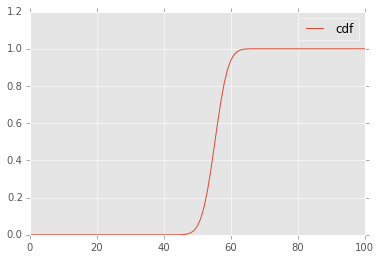

In [173]:
df_non_uniform_cdf = df_non_uniform.posterior.cumsum()
df_non_uniform_cdf.plot(label='cdf', legend=True, ylim = (0,1.2))

In [174]:
df_non_uniform_ci_cdf = ( calc_hyp_percentile_cdf(df_non_uniform.posterior, .05) , calc_hyp_percentile_cdf(df_non_uniform.posterior, .95) )
df_non_uniform_ci_cdf

(50, 60)

- Plotting both priors on same scale:

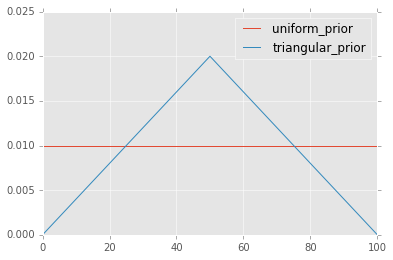

In [175]:
df_prior_uniform = pd.DataFrame(df.uniform_prior, columns = ['uniform_prior'])
df_prior_triangular = pd.DataFrame(df_non_uniform.triangular_prior, columns = ['triangular_prior'])
df_prior_uniform['triangular_prior'] = df_prior_triangular.triangular_prior
df_prior_uniform.plot()

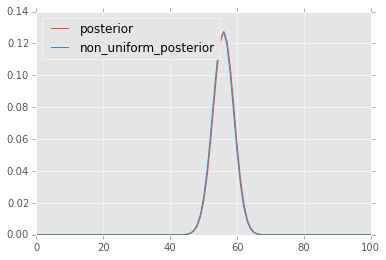

In [186]:
df_posterior_uniform = pd.DataFrame(df.posterior, columns = ['posterior'])
df_posterior_triangular = pd.DataFrame(df_non_uniform.posterior, columns = ['posterior'])
df_posterior_uniform['non_uniform_posterior'] = df_posterior_triangular.posterior
df_posterior_uniform.plot()

#### Beta Distribution
 - Intuitive explanation of beta distributions: http://stats.stackexchange.com/questions/47771/what-is-the-intuition-behind-beta-distribution ( explained with a simple example involving baseball batting averages)
 - This example has been discussed at this notebook: http://nbviewer.ipython.org/github/kramaswamyxu/Notebooks/blob/master/beta_distribution.ipynb in detail

#### Key points:

- The beta distribution is a continous distribution on the scale of (0,1).
- The beta distribution is a conjugate prior - having a beta prior makes the posterior of type beta distribution too.
- If the beta prior is a distribution that depends on $ \alpha $ and $ \beta $, then the posterior will be a beta distribution on $ \alpha $ + 140 and $ \beta $ + 110 for data of 140 heads and 110 tails.
- Typically used in bernoulli type examples - those involving successes - can be used hence in this example too.

- The beta distribution for $ \alpha $ = 1 and $ \beta $ = 1 gives an uniform distribution and thus can be used as an uniform prior.

In [192]:
from scipy.stats import beta
rv = beta(1, 1)
import numpy as np
import pandas as pd
df['prob'] = np.linspace(0,1, len(df))
df['beta_prior'] = rv.pdf(np.linspace(0,1, len(df)))

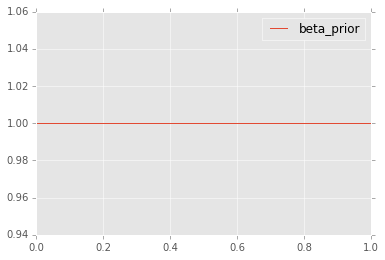

In [193]:
plt.plot(df.prob,df.beta_prior, label = 'beta_prior')
plt.legend(loc='upper right')

In [194]:
alpha_parameter = 1
beta_parameter = 1
for data in dataset:
    if data is 'H':
        alpha_parameter += 1
    else:
        beta_parameter += 1
rv_posterior = beta(alpha_parameter, beta_parameter)
df['posterior'] = rv_posterior.pdf(np.linspace(0,1, len(df)))

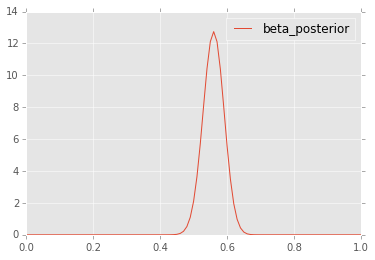

In [195]:
plt.plot(df.prob,df.posterior, label = 'beta_posterior')
plt.legend(loc='upper right')

In [107]:
rv_posterior.mean()

0.55952380952380953

In [108]:
rv_posterior.interval(0.90)

(0.50790363161299701, 0.61060570158914973)